<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/caracteristicasOdio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural**

***
Datos del alumno (Nombre y Apellidos): HAROL ESTEVEZ

Fecha: 13/12/2024
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Trabajo: Named-Entity Recognition</span>

**Objetivos**

Con esta actividad se tratará de que el alumno se familiarice con el manejo de la librería spacy, así como con los conceptos básicos de manejo de las técnicas NER

**Descripción**

En esta actividad debes procesar de forma automática un texto en lenguaje natural para detectar características básicas en el mismo, y para identificar y etiquetar las ocurrencias de conceptos como localización, moneda, empresas, etc.

En la primera parte del ejercicio se proporciona un código fuente a través del cual se lee un archivo de texto y se realiza un preprocesado del mismo. En esta parte el alumno tan sólo debe ejecutar y entender el código proporcionado.

En la segunda parte del ejercicio se plantean una serie de preguntas que deben ser respondidas por el alumno. Cada pregunta deberá responderse con un fragmento de código fuente que esté acompañado de la explicación correspondiente. Para elaborar el código solicitado, el alumno deberá visitar la documentación de la librería spacy, cuyos enlaces se proporcionarán donde corresponda.

# Parte 1: carga y preprocesamiento del texto a analizar

Observa las diferentes librerías que se están importando.

In [20]:
!pip install spacy
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 10.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
import pathlib
import spacy
import pandas as pd
from spacy import displacy
import csv
import es_core_news_md
import matplotlib.pyplot as plt
import seaborn as sns

El siguiente código simplemente carga y preprocesa el texto. Para ello, lo primero que hace es cargar un modelo de lenguaje previamente entrenado. En este caso, se utiliza <i>es_core_news_md</i>:

https://spacy.io/models/es#es_core_news_md


In [22]:
nlp = es_core_news_md.load()

El objeto <i>nlp</i> permite utilizar el modelo de lenguaje cargado, de forma que se puede procesar un texto y obtenerlo en su versión preprocesada. Así, nos permite realizar las diferentes tareas. En este caso, vamos a utilizar el pipeline para hacer un preprocesamiento básico, que consiste en tokenizar el texto.

In [23]:
filename = "/content/comentariosOdio.csv"

# Leer el archivo con manejo de errores
with open(filename, 'rb') as f:
    content = f.read().decode('latin1', errors='replace')

import io
data = pd.read_csv(io.StringIO(content), delimiter=';')

# Mostrar los primeros registros
print(data.head())

       MEDIO SOPORTE                                                URL  \
0  EL PAÃS      WEB  https://elpais.com/deportes/2021-01-20/alcoyan...   
1  EL PAÃS      WEB  https://elpais.com/deportes/2021-01-20/alcoyan...   
2  EL PAÃS      WEB  https://elpais.com/espana/2021-01-18/comienza-...   
3  EL PAÃS      WEB  https://elpais.com/espana/2021-01-18/comienza-...   
4  EL PAÃS      WEB  https://elpais.com/espana/2021-01-18/comienza-...   

  TIPO DE MENSAJE                               CONTENIDO A ANALIZAR  \
0      COMENTARIO  el barÃ§a nunca acaeza ante un segundo b ni an...   
1      COMENTARIO  el real madrid ha puesto punto y final a su an...   
2      COMENTARIO  cristina cifuentes podrÃ­a haber sido la presi...   
3      COMENTARIO  habrÃ­a que reabrir el caso. el supremo se ded...   
4      COMENTARIO  me parece un poco exagerado pedir mÃ¡s de tres...   

   INTENSIDAD TIPO DE ODIO TONO HUMORISTICO MODIFICADOR  Unnamed: 9  \
0         3.0        Otros              NaN  

<ipython-input-23-f6649b593c05>:8: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(io.StringIO(content), delimiter=';')


# Análisis Exploratorio de Datos (EDA)

In [26]:
# 1. Resumen general del dataset
print("Resumen general del dataset:")
print(data.info())
print("\nResumen estadístico:")
print(data.describe(include='all'))

Resumen general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103177 entries, 0 to 103176
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MEDIO                 103177 non-null  object 
 1   SOPORTE               103170 non-null  object 
 2   URL                   103167 non-null  object 
 3   TIPO DE MENSAJE       103167 non-null  object 
 4   CONTENIDO A ANALIZAR  103167 non-null  object 
 5   INTENSIDAD            103164 non-null  float64
 6   TIPO DE ODIO          1606 non-null    object 
 7   TONO HUMORISTICO      50 non-null      object 
 8   MODIFICADOR           57 non-null      object 
 9   Unnamed: 9            0 non-null       float64
 10  Unnamed: 10           0 non-null       float64
 11  Unnamed: 11           0 non-null       float64
 12  Unnamed: 12           0 non-null       float64
 13  Unnamed: 13           0 non-null       float64
 14  Unnamed: 14           0

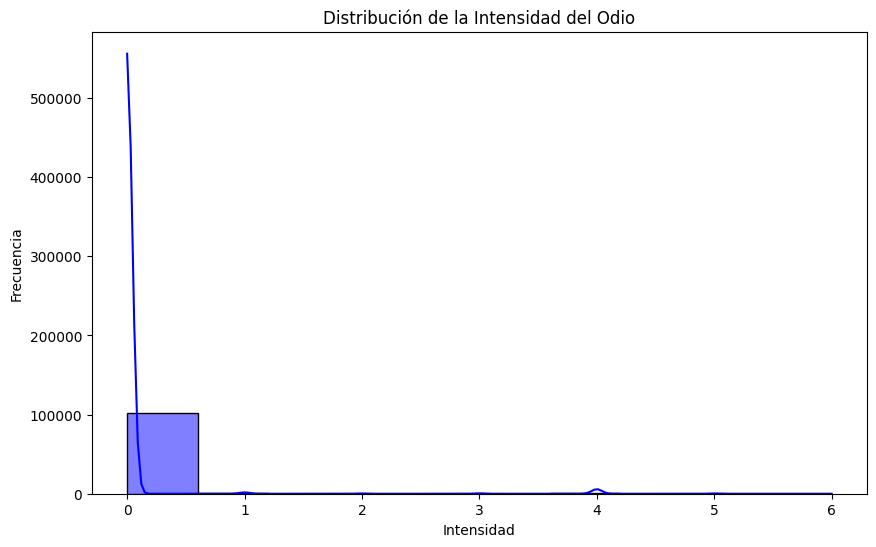

In [27]:
# 2. Distribución de la intensidad del odio
plt.figure(figsize=(10, 6))
sns.histplot(data['INTENSIDAD'], bins=10, kde=True, color='blue')
plt.title('Distribución de la Intensidad del Odio')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

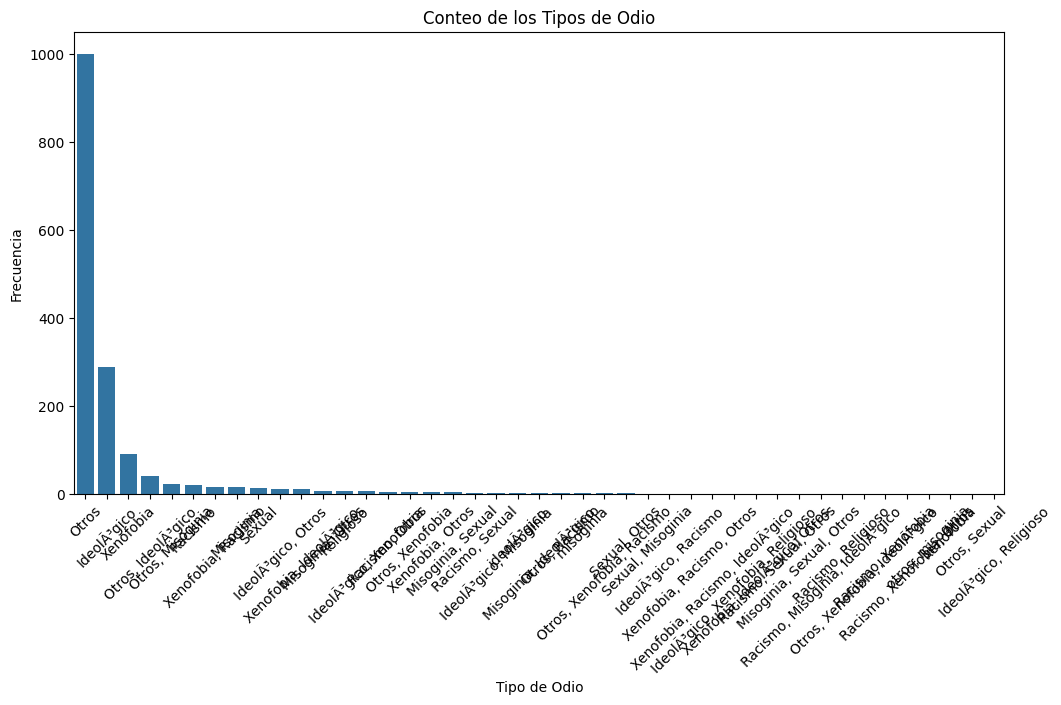

In [28]:
# 3. Conteo de los tipos de odio
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='TIPO DE ODIO', order=data['TIPO DE ODIO'].value_counts().index)
plt.title('Conteo de los Tipos de Odio')
plt.xlabel('Tipo de Odio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

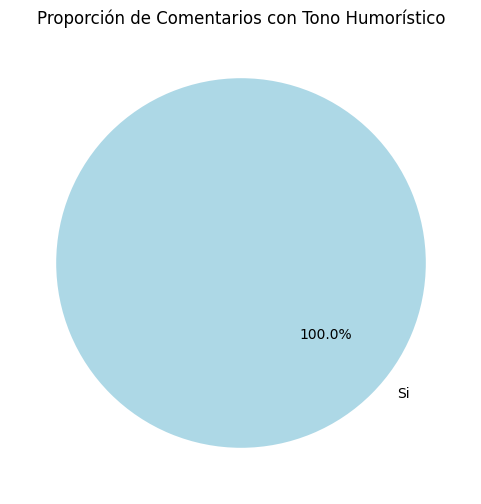

In [29]:
# 4. Conteo de comentarios con tono humorístico
humoristicos = data['TONO HUMORISTICO'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(humoristicos, labels=humoristicos.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgray'])
plt.title('Proporción de Comentarios con Tono Humorístico')
plt.show()

In [ ]:
# 5. Top 10 palabras clave en los comentarios (requiere spaCy)
import spacy
from collections import Counter

nlp = spacy.load("es_core_news_md")

def extraer_palabras(texto):
    if pd.isnull(texto):
        return []
    doc = nlp(texto)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Aplicar a la columna 'CONTENIDO A ANALIZAR'
data['PROCESADO'] = data['CONTENIDO A ANALIZAR'].apply(extraer_palabras)

# Contar las palabras más frecuentes
palabras = [palabra for lista in data['PROCESADO'] for palabra in lista]
conteo_palabras = Counter(palabras)
palabras_comunes = conteo_palabras.most_common(10)

# Visualizar las palabras más frecuentes
palabras, frecuencias = zip(*palabras_comunes)
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencias, y=palabras, color='blue')
plt.title('Top 10 Palabras Clave en los Comentarios')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

El código anterior carga el archivo CSV (opcionalmente con un límite de líneas a leer) y genera la variable <i>data</i>, que contiene un Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos leídos del CSV.

Te vendrá bien conocer la siguiente documentación:
<ul>
    <li>https://spacy.io/api/doc</li>
    <li>https://spacy.io/api/token</li>
    <li>https://spacy.io/api/morphology#morphanalysis</li>
</ul>

### Playground

Utiliza este espacio para hacer pruebas y ensayos con las variables generadas con el código previo. A modo de ejemplo, se ofrece código que realiza las siguientes tareas:


- leer un número dado de líneas del Dataframe y generar dos listas con los valores (se pueden leer directamente del DataFrame, se muestra el ejemplo como una opción más)
- procesar el texto de cada comentario


Para procesarlo, hay utilizar el objeto <i>nlp</i> y así obtener objetos de la clase <i>Doc</i> (https://spacy.io/api/doc)

Visita la documentación de dicha clase y experimenta probando las diferentes funciones y atributos

In [ ]:
# Puedes insertar aquí código de pruebas para experimentar con las diferentes funciones y atributos de 'doc'.
#print(data["CONTENIDO A ANALIZAR"][1])
#print(data["INTENSIDAD"][1])
doc = []
value = []

#con el bucle, generamos sendas listas con los comentarios ya parseados y con el valor de intensidad
for i in range(0, lines_number):

    #en un primer paso se parsea el comentario. En el segundo paso se añade el objeto a la lista
    tmp_doc = nlp(data["CONTENIDO A ANALIZAR"][i])
    doc.append(tmp_doc)

    #en un primer paso extrae el valor. En el segundo paso se añade el valor a la lista
    tmp_value = data["INTENSIDAD"][i]
    value.append(tmp_value)


#ejemplo de cómo recorrer un comentario palabra por palabra
for token in doc[1]:
    print(token)

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 1.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántos registros contiene el corpus?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
num_registros = data.shape[0]
print(f'Pregunta 1: El corpus contiene {num_registros} registros.')

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 2.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas palabras totales hay en los comentarios del corpus?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
num_palabras_totales = data['CONTENIDO A ANALIZAR'].dropna().apply(lambda x: len(x.split())).sum()
print(f'Pregunta 2: El corpus contiene {num_palabras_totales} palabras en total.')


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 3.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál el número promedio de palabras en cada comentario?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
promedio_palabras = data['CONTENIDO A ANALIZAR'].dropna().apply(lambda x: len(x.split())).mean()
print(f'Pregunta 3: El promedio de palabras por comentario es {promedio_palabras:.2f}.')

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 4.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál el número promedio de palabras en los comentarios de cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
def es_odio(tipo):
    return not pd.isnull(tipo)

data['ES_ODIO'] = data['TIPO DE ODIO'].apply(es_odio)

promedio_palabras_odio = data[data['ES_ODIO']]['CONTENIDO A ANALIZAR'].dropna().apply(lambda x: len(x.split())).mean()
promedio_palabras_no_odio = data[~data['ES_ODIO']]['CONTENIDO A ANALIZAR'].dropna().apply(lambda x: len(x.split())).mean()

print(f'Pregunta 4: El promedio de palabras en comentarios de odio es {promedio_palabras_odio:.2f}.')
print(f'Pregunta 4: El promedio de palabras en comentarios que no son de odio es {promedio_palabras_no_odio:.2f}.')

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 5.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el número promedio de oraciones en los comentarios de cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
def contar_oraciones(texto):
    doc = nlp(texto)
    return len(list(doc.sents))

data['NUM_ORACIONES'] = data['CONTENIDO A ANALIZAR'].dropna().apply(contar_oraciones)

promedio_oraciones_odio = data[data['ES_ODIO']]['NUM_ORACIONES'].mean()
promedio_oraciones_no_odio = data[~data['ES_ODIO']]['NUM_ORACIONES'].mean()

print(f'Pregunta 5: El promedio de oraciones en comentarios de odio es {promedio_oraciones_odio:.2f}.')
print(f'Pregunta 5: El promedio de oraciones en comentarios que no son de odio es {promedio_oraciones_no_odio:.2f}.')


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 6.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER en cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
def contiene_entidades(texto):
    doc = nlp(texto)
    return any(ent.text for ent in doc.ents)

data['TIENE_ENTIDADES'] = data['CONTENIDO A ANALIZAR'].dropna().apply(contiene_entidades)

porcentaje_entidades_odio = data[data['ES_ODIO']]['TIENE_ENTIDADES'].mean() * 100
porcentaje_entidades_no_odio = data[~data['ES_ODIO']]['TIENE_ENTIDADES'].mean() * 100

print(f'Pregunta 6: El porcentaje de comentarios con entidades NER en el grupo de odio es {porcentaje_entidades_odio:.2f}%.')
print(f'Pregunta 6: El porcentaje de comentarios con entidades NER en el grupo que no es de odio es {porcentaje_entidades_no_odio:.2f}%.')

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 7.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
def contiene_entidad_person(texto):
    doc = nlp(texto)
    return any(ent.label_ == "PER" for ent in doc.ents)

data['TIENE_PERSON'] = data['CONTENIDO A ANALIZAR'].dropna().apply(contiene_entidad_person)

porcentaje_person_odio = data[data['ES_ODIO']]['TIENE_PERSON'].mean() * 100
porcentaje_person_no_odio = data[~data['ES_ODIO']]['TIENE_PERSON'].mean() * 100

print(f'Pregunta 7: El porcentaje de comentarios con entidades NER de tipo PERSON en el grupo de odio es {porcentaje_person_odio:.2f}%.')
print(f'Pregunta 7: El porcentaje de comentarios con entidades NER de tipo PERSON en el grupo que no es de odio es {porcentaje_person_no_odio:.2f}%.')


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 8.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de palabras en cada combinación posible de género y número (p.ej. masculino singular) en cada grupo?</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
def obtener_genero_numero(texto):
    doc = nlp(texto)
    combinaciones = [f"{token.morph.get('Gender', [''])[0]}_{token.morph.get('Number', [''])[0]}"
                     for token in doc if token.morph.get('Gender') and token.morph.get('Number')]
    return combinaciones

data['GENERO_NUMERO'] = data['CONTENIDO A ANALIZAR'].dropna().apply(obtener_genero_numero)

# Calcular proporciones
odio_tokens = Counter([item for sublist in data[data['ES_ODIO']]['GENERO_NUMERO'] for item in sublist])
no_odio_tokens = Counter([item for sublist in data[~data['ES_ODIO']]['GENERO_NUMERO'] for item in sublist])

odio_total = sum(odio_tokens.values())
no_odio_total = sum(no_odio_tokens.values())

proporciones_odio = {k: v / odio_total * 100 for k, v in odio_tokens.items()}
proporciones_no_odio = {k: v / no_odio_total * 100 for k, v in no_odio_tokens.items()}

print("Pregunta 8: Porcentaje de palabras por combinación género-número en comentarios de odio:")
for k, v in proporciones_odio.items():
    print(f"{k}: {v:.2f}%")

print("\nPregunta 8: Porcentaje de palabras por combinación género-número en comentarios que no son de odio:")
for k, v in proporciones_no_odio.items():
    print(f"{k}: {v:.2f}%")


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 9.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), indica cuántas entidades de cada tipo posible se reconocen en cada uno de los grupos</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta
def contar_entidades_por_tipo(texto):
    doc = nlp(texto)
    return [ent.label_ for ent in doc.ents]

data['ENTIDADES'] = data['CONTENIDO A ANALIZAR'].dropna().apply(contar_entidades_por_tipo)

odio_entidades = Counter([entidad for lista in data[data['ES_ODIO']]['ENTIDADES'] for entidad in lista])
no_odio_entidades = Counter([entidad for lista in data[~data['ES_ODIO']]['ENTIDADES'] for entidad in lista])

print("\nPregunta 9: Cantidad de entidades por tipo en comentarios de odio:")
for tipo, cantidad in odio_entidades.items():
    print(f"{tipo}: {cantidad}")

print("\nPregunta 9: Cantidad de entidades por tipo en comentarios que no son de odio:")
for tipo, cantidad in no_odio_entidades.items():
    print(f"{tipo}: {cantidad}")

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 10.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), extrae y muestra los 100 lemas más repetidos en los comentarios de cada grupo</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 11.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Es posible utilizar alguna de las características extraídas en las preguntas anteriores para determinar si un mensaje contiene odio? Justifica tu respuesta con el análisis estadístico que consideres necesario.</span>

In [ ]:
# Incluye aquí el código generado para poder responder a tu pregunta


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
